In [1]:
import os
import sys
sys.path.append("../") # go to parent dir
import glob
import time
import pathlib
import logging
import numpy as np
from scipy.sparse import linalg as spla
#from dedalus.tools.config import config
#from simple_sphere import SimpleSphere, TensorField, TensorSystem
#import equations
import matplotlib.pyplot as plt
%matplotlib inline
#import cartopy.crs as ccrs
#from dedalus.extras import plot_tools
import logging
from mpl_toolkits import mplot3d
logger = logging.getLogger(__name__) 
from matplotlib.animation import FFMpegWriter
from matplotlib.patches import Rectangle, Wedge
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

STRNAME = "sphere118"
#add path to data folder
input_folder = "/Volumes/ExtDrive/data"
output_folder = "/Users/Rohit/Documents/research/active_matter_spheres/scripts/garbage"
first_frame = 1
last_frame = len(glob.glob1('%s/%s/' %(input_folder, STRNAME),"*.npz"))
#last_frame = 3000
dpi = 256
Omega = 500
if STRNAME == "sphere118":
    Lmid = 8
elif STRNAME == "sphere110":
    Lmid = 4
else: 
    Lmid = 2

# Setup output folder
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

print('Total time stamps = %i' %(last_frame-first_frame))


Total time stamps = 4999


In [2]:
t_arr = np.zeros(last_frame)

with np.load('%s/%s/output_%i.npz' %(input_folder, STRNAME, 1)) as file:
    phi = file['phi']
    theta = file['theta']

om = np.zeros((last_frame, phi.shape[0], theta.shape[0]))
#vph = np.zeros_like(om)
    
for ind in range(first_frame, last_frame + 1, 1):
    if ind%100==0: print(ind)
    with np.load('%s/%s/output_%i.npz' %(input_folder, STRNAME, ind)) as file:
        #vph[ind-1, :, :] = file['v_ph']
        om[ind-1, :, :] = file['om']
        t_arr[ind-1] = file['t'][0]
        
om_max = np.max(om)
#vph_max = np.max(vph)

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000


In [3]:
#get gammas from Lmid and kappa setting R=1 and tau=1
def get_gammas(Lmid, kappa):
    
    a = 0.25*(Lmid**2*kappa**2 - 0.5*(2*np.pi*Lmid+1)**2)**2 + 17*17/16 - (34/16)*(2*np.pi*Lmid+1)**2
    b = (17/4 - 0.25*(2*np.pi*Lmid+1)**2)**2
    c = 1/(17/4 - 0.25*(2*np.pi*Lmid + 1)**2 - 2)
    gamma0 = a*c/(a-b)
    gamma2 = -2*np.sqrt(b)*c/(a-b)
    gamma4 = c/(a-b)
    
    return [gamma0, gamma2, gamma4]

#define function that returns the neutral ell's for a given R/Lambda and kappa
def get_l(Lmid, kappa):
    
    gamma0, gamma2, gamma4 = get_gammas(Lmid, kappa)
    delta_p = (0.5/gamma4)*(-gamma2+np.sqrt(gamma2**2-4*gamma0*gamma4))
    delta_m = (0.5/gamma4)*(-gamma2-np.sqrt(gamma2**2-4*gamma0*gamma4))
    
    l_p = 0.5*(-1+np.sqrt(17+4*delta_p))
    l_m = 0.5*(-1+np.sqrt(17+4*delta_m))
        
    return l_m, l_p

def get_k(γ0, γ2, γ4):
    k_m = np.sqrt((-γ2 - np.sqrt(γ2**2 - 4*γ0*γ4))/(2*γ4))
    k_p = np.sqrt((-γ2 + np.sqrt(γ2**2 - 4*γ0*γ4))/(2*γ4))
    
    return k_m, k_p

def get_kmax(γ0, γ2, γ4):
    k_max = np.sqrt(-γ2/(2*γ4))
    
    return k_max
    

## Make Figure 4 of the paper

//anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


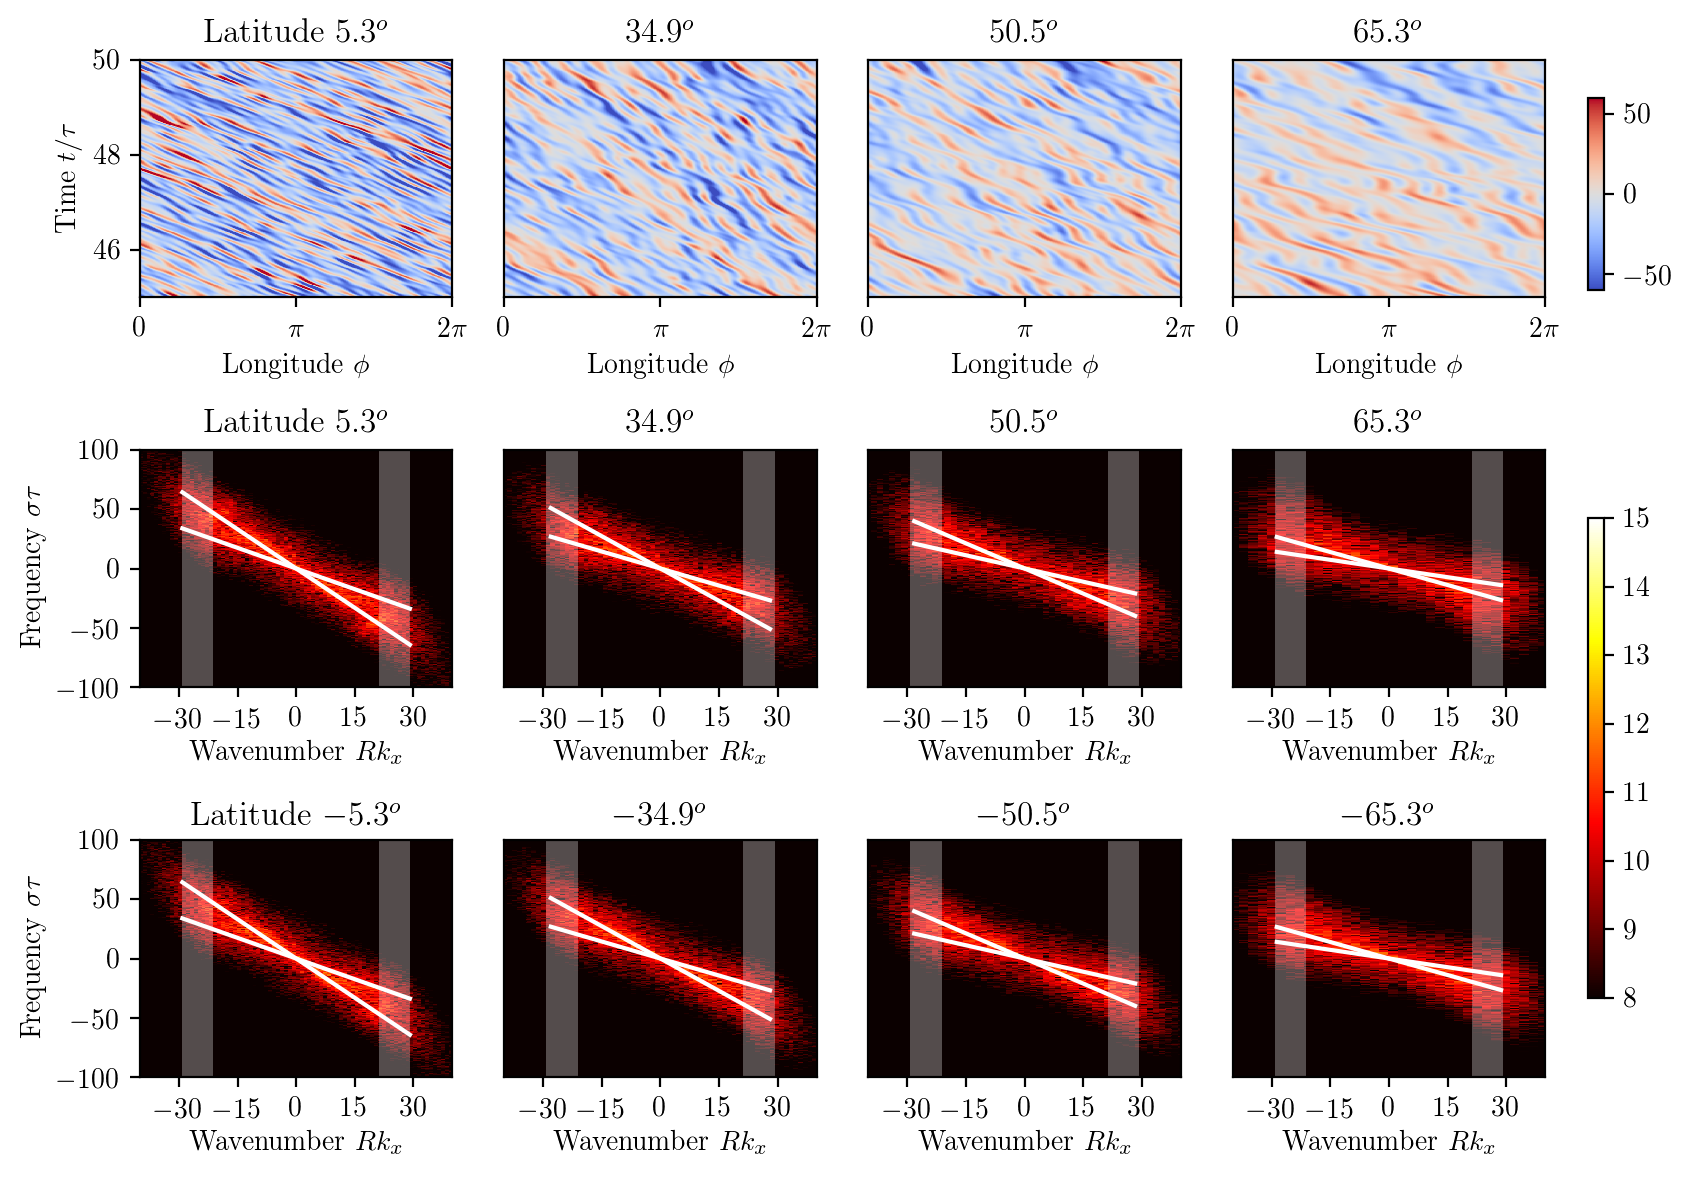

In [8]:
import matplotlib as mpl
fm = mpl.font_manager
fm.get_cachedir()

from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)


#lats_north = np.array([5, 20, 35, 50])
lats_north = np.array([5, 35, 50, 65])
lats_south = -lats_north

#th_inds_north = np.arange(135, 220, 28, dtype=int)
#th_inds_south = np.arange(120, 30, -28)

#just make the grid symmetric
theta_ = np.linspace(np.pi, 0, len(theta))
lats = (np.pi/2-theta)*180/np.pi

th_inds_north = []
for lat in lats_north:
    th_inds_north.append(np.argmin(np.abs(lats-lat)))
    
th_inds_south = []
for lat in lats_south:
    th_inds_south.append(np.argmin(np.abs(lats-lat)))
    
th_inds = np.hstack([th_inds_north, th_inds_south])
   
time_inds = np.arange(2000, 4500, 1)

#set the vertical wavenumbervmin=-75, vmax=75
k_m, k_p = get_k(*get_gammas(Lmid,1))
k_max = get_kmax(*get_gammas(Lmid,1))

window = np.hamming(len(time_inds)).reshape(len(time_inds),1)

fig = plt.figure(figsize=(8, 6), dpi=200)

count = 1
for i in th_inds_north:
    plt.subplot(3, len(th_inds)/2, count)
    img1 = plt.pcolormesh(phi, t_arr, om[:,:,i]-np.mean(om[:,:,i]), cmap='coolwarm', rasterized=True, vmin=-60, vmax=60)
    #plt.colorbar()
    plt.ylim([45,50])
    if count != 1: plt.yticks([], [])
    else: plt.ylabel(r'Time $t/\tau$', usetex=True)
    if count==1:
        plt.title(r'Latitude $%0.1f^{o}$' %((np.pi/2-theta_[i])*180/np.pi))
    else:
        plt.title(r'$%0.1f^{o}$' %((np.pi/2-theta_[i])*180/np.pi))
        
    plt.xlabel(r'Longitude $\phi$', usetex=True)
    plt.xticks([0, np.pi, 2*np.pi], labels=[r'$0$', r'$\pi$', r'$2 \pi$'])

    count += 1

count = 1
for i in th_inds:
    
    sig_eq = om[:, :, i]
    
    sig_fft = np.fft.fft2(sig_eq[time_inds, :]*window)
    sig_fft = np.fft.fftshift(sig_fft)
    dphi = phi[2] - phi[1]
    dt = t_arr[2] - t_arr[1]

    phi_freq = 2*np.pi*np.fft.fftshift(np.fft.fftfreq(len(phi), d=dphi))
    #time freq is taken to be negative to be consistent with the waves definition
    time_freq = -2*np.pi*np.fft.fftshift(np.fft.fftfreq(len(t_arr[time_inds]), d=dt))
    
    kx = phi_freq/np.sin(theta_[i])

    
    plt.subplot(3, len(th_inds)/2, 4+count)
    img2 = plt.pcolormesh(kx, time_freq, np.log10(np.abs(sig_fft)**2), cmap='hot', vmin=8, vmax=15, rasterized=True)
    if count != 1 and count !=len(th_inds)/2+1: plt.yticks([], [])
    else: plt.ylabel(r'Frequency $\sigma \tau$', usetex=True)
    
    if count==1 or count==5:
        plt.title(r'Latitude $%0.1f^{o}$' %((np.pi/2-theta_[i])*180/np.pi))
    else:
        plt.title(r'$%0.1f^{o}$' %((np.pi/2-theta_[i])*180/np.pi))    
    
    plt.xlabel(r'Wavenumber $R k_x$', usetex=True)
    
    kx_plot = kx.copy()
    kx_plot[kx < -k_p] = np.nan
    kx_plot[kx > k_p] = np.nan
    #k_m
    plt.plot(kx_plot, -2*Omega*kx_plot*np.sin(theta_[i])/(k_m**2), 'w', linewidth=1.5)
    #k_p    
    plt.plot(kx_plot, -2*Omega*kx_plot*np.sin(theta_[i])/(k_p**2), 'w', linewidth=1.5)

    plt.xticks([-30, -15, 0, 15, 30])
    
    rect = Rectangle((-k_p, -150), k_p-k_m, 300, facecolor='white', alpha=0.3, rasterized=True)
    plt.gca().add_patch(rect)
    rect = Rectangle((k_m, -150), k_p-k_m, 300, facecolor='white', alpha=0.3, rasterized=True)
    plt.gca().add_patch(rect)

    plt.ylim([-100, 100])
    plt.xlim([-40, 40])
    
    if count == len(th_inds):
        fig.subplots_adjust(right=0.9)
        cbaxes1 = fig.add_axes([0.999, 0.75, 0.01, 0.16])
        cbaxes2 = fig.add_axes([0.999, 0.16, 0.01, 0.4]) 

        cb1 = fig.colorbar(img1, cax = cbaxes1)
        cb2 = fig.colorbar(img2, cax = cbaxes2)

        #cb1.ax.set_title(r'$\,\,\zeta - \langle \zeta \rangle$', pad=10)
        #cb2.ax.set_title(r'$\log(S)$', pad=10)
    
    count += 1

fig.tight_layout()
plt.savefig('../plots/figure4_%s.pdf' %(STRNAME), bbox_inches='tight', dpi=300)
